# Compte rendu mini-projet suite logistique 
### Antoine Molines

## But
Le but de ce mini-projet est d'étudier le comportement de la fonction/suite logistique, un exemple de système chaotique, c'est à dire un système dont l'évolution dépend drastiquement des conditions initiales: même un infime chagement dans les conditions intiales changent totalement l'évolution de la fonction. La fonction logistique en est un exemple, elle a pour expression:$$ f(x) = r (1-x) x $$ On définit la suite logisitque comme : $$ x_{i+1} = f(x_i) $$






## Comportement de la suite
Selon la valeur du paramètre $r$ qui est compris entre $1$ et $4$, la suite a différents comportements.

Pour $r=2.5$, on obtient:


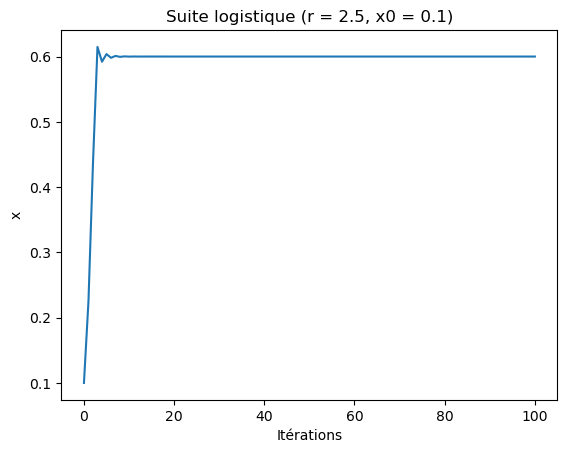

In [1]:
import matplotlib.pyplot as plt

# Paramètres initiaux
r = 2.5
x0 = 0.1
n_iterations = 100  # Nombre d'itérations à afficher

# Liste pour stocker les valeurs de la suite
x_values = [x0]

# Calcul de la suite logistique
x = x0    #Premier terme
for _ in range(n_iterations):   #On fait le calcul 100 fois
    x = r * x * (1 - x)
    x_values.append(x)    #On ajoute chaque valeurs à la liste

# Affichage des résultats
plt.plot(x_values)
plt.title("Suite logistique (r = 2.5, x0 = 0.1)")
plt.xlabel("Itérations")
plt.ylabel("x")
plt.show()


On voit bien que pour $r=2.5$, la suite converge à partir d'une quinzaine d'itération vers une valeur a peu près égale à $0.6$
En essayant plusieurs valeurs de $r$, on voit que pour des valeurs inférieure ou égale à $1.1$ la suite tend vers $0$:

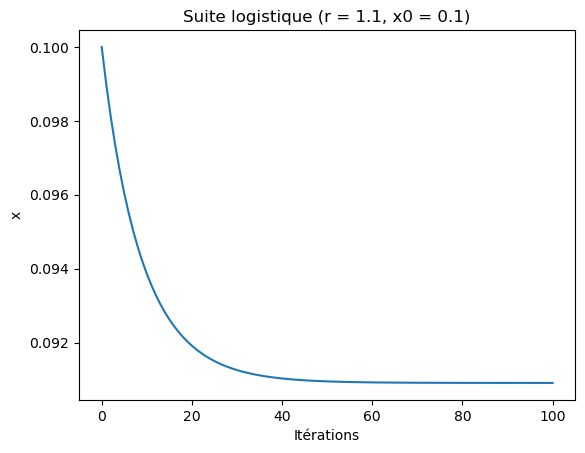

In [2]:
r = 1.1
x0 = 0.1
n_iterations = 100  # Nombre d'itérations à afficher

# Liste pour stocker les valeurs de la suite
x_values = [x0]

# Calcul de la suite logistique
x = x0    #Premier terme
for _ in range(n_iterations):   #On fait le calcul 100 fois
    x = r * x * (1 - x)
    x_values.append(x)    #On ajoute chaque valeurs à la liste

# Affichage des résultats
plt.plot(x_values)
plt.title("Suite logistique (r = 1.1, x0 = 0.1)")
plt.xlabel("Itérations")
plt.ylabel("x")
plt.show()

Tandis que pour des valeurs de $r$ comprises entre $2.5$ et $3.5$, la suite alterne entre plusieurs valeures: 

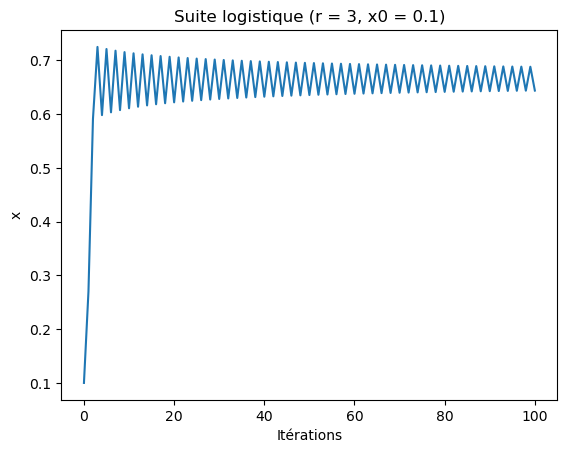

In [3]:
r = 3
x0 = 0.1
n_iterations = 100  # Nombre d'itérations à afficher

# Liste pour stocker les valeurs de la suite
x_values = [x0]

# Calcul de la suite logistique
x = x0    #Premier terme
for _ in range(n_iterations):   #On fait le calcul 100 fois
    x = r * x * (1 - x)
    x_values.append(x)    #On ajoute chaque valeurs à la liste

# Affichage des résultats
plt.plot(x_values)
plt.title("Suite logistique (r = 3, x0 = 0.1)")
plt.xlabel("Itérations")
plt.ylabel("x")
plt.show()


Et pour des valeurs supérieures à $3.6$, la suite devient complétement chaotique est imprévivisble:

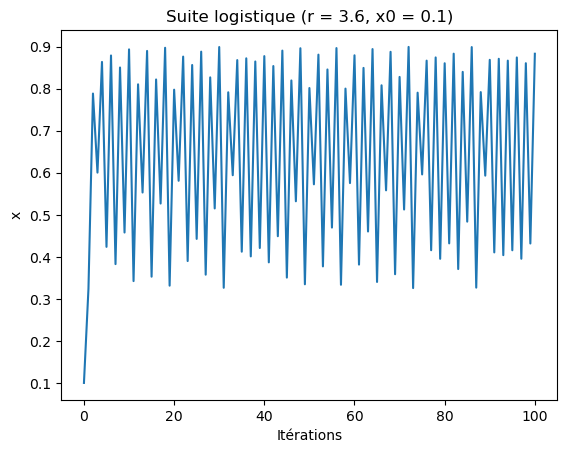

In [4]:
# Paramètres initiaux
r = 3.6
x0 = 0.1
n_iterations = 100  # Nombre d'itérations à afficher

# Liste pour stocker les valeurs de la suite
x_values = [x0]

# Calcul de la suite logistique
x = x0    #Premier terme
for _ in range(n_iterations):   #On fait le calcul 100 fois
    x = r * x * (1 - x)
    x_values.append(x)    #On ajoute chaque valeurs à la liste

# Affichage des résultats
plt.plot(x_values)
plt.title("Suite logistique (r = 3.6, x0 = 0.1)")
plt.xlabel("Itérations")
plt.ylabel("x")
plt.show()

## Diagramme de bifurcation
On va donc caractériser les différentes limites de la suite en fonction des valeurs de $r$ en créant un diagramme de bifurcation, c'est à dire un diagramme qui affiche chaque valeurs de limites possible (il y en a desfois plusieurs) en fonction du paramètre $r$, en prenant pour commencer une valeur de $x$ initiale à $0.00001$. Vu qu'il y a parfois plusieurs limites possible, on affiche les $100$ derniers termes.
 

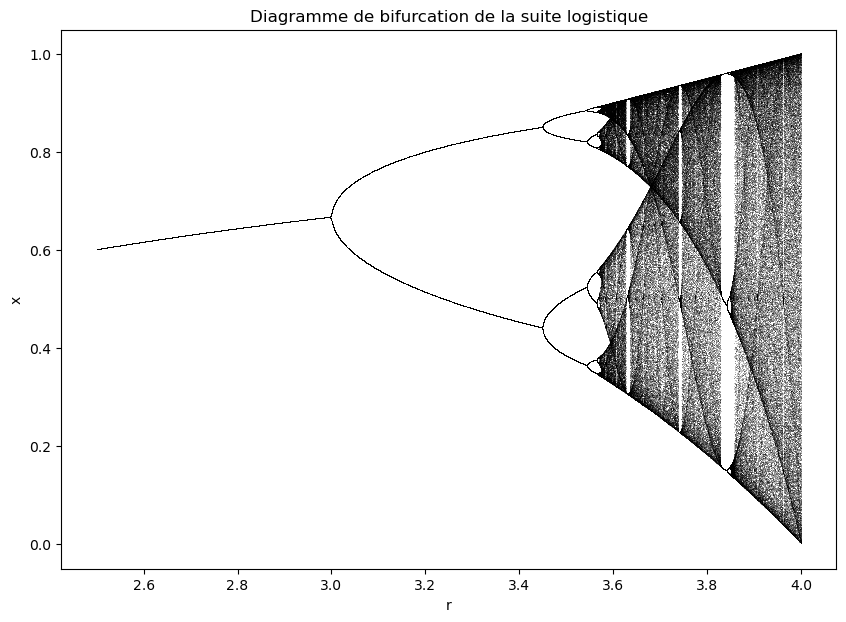

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
x0 = 0.00001  # Valeur initiale
n_iterations = 1000  # Nombre d'itérations
n_last_terms = 100  # Nombre de termes à garder pour chaque r

# Plage des valeurs de r (entre 2.5 et 4)
r_values = np.linspace(2.5, 4, 10000)

# Préparation du graphique
plt.figure(figsize=(10, 7))

# Pour chaque valeur de r
for r in r_values:
    # Calcul des 1000 premiers termes de la suite logistique
    x = x0    #Valeur initiale de la suite
    x_values = []       #initialisation de la liste des valeurs de la suite
    for _ in range(n_iterations):   
        x = r * x * (1 - x)  # Calcul de la suite logistique pour 1000 termes
        x_values.append(x)   #Ajout des termes à la liste
    
    # On garde seulement les 100 derniers termes
    last_terms = x_values[-n_last_terms:]
    
    # Tracer les derniers termes pour la valeur de r actuelle
    plt.plot([r] * n_last_terms, last_terms, ',k', alpha=0.25)  

# Titrage et affichage du graphique
plt.title("Diagramme de bifurcation de la suite logistique")
plt.xlabel("r")
plt.ylabel("x")
plt.show()

On observe sur ce graphe que pour des valeurs à peu près entre $2.5$ et $3$ la suite n'a qu'une limite. Pour des valeurs entre $3$ et $3.5$, la suite en a 2, et ainsi de suite jusqu'à $r=3.7$ où la suite devient completement chaotique. On observe d'ailleurs qu'il y a certaines valeurs de $r>3.7$ pour lesquelles la suite n'est pas chaotique, mais elles sont assez rares. Aussi, ce diagramme ne dépend pas de la valeur initiale de x.

## Exposant de Lyapunov
On peut caractériser le "nombre de limite" ou la divergence de cette suite en fonction de $r$ par l'Exposant de Lyapunov d'expression:$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$. 
En calculant la valeur de cet exposant pour chaque valeur de $r$ entre $2.5$ et $4$, on obtient:


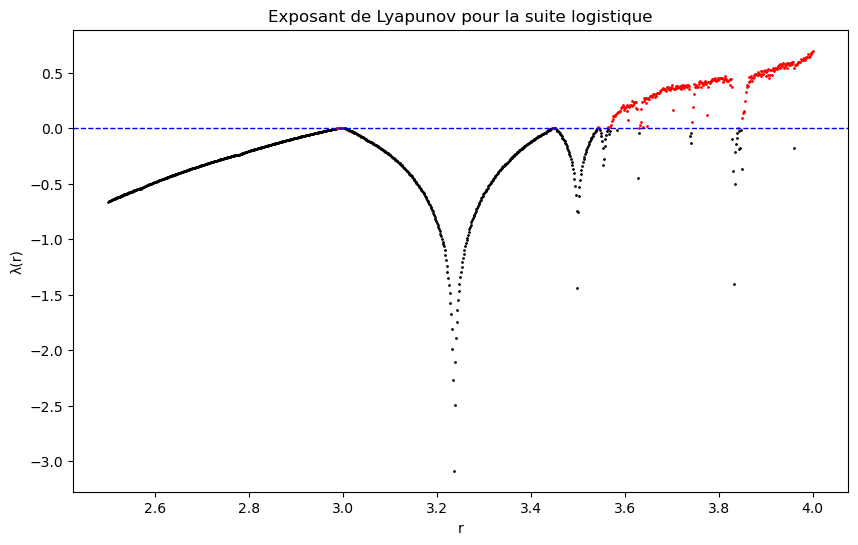

In [6]:
# Initialisation des listes pour stocker les résultats
r_list = []   #création des listes intiales pour les r et lambda
lambda_list = []

#réduction du nombre de point à calulcer/afficher pour réduire le temps
n_iterations = 500
r_values = np.linspace(2.5, 4, 1000)

# Calcul de l'exposant de Lyapunov pour chaque r
for r in r_values:
    x = x0       #valeur de la suite logistique initiales
    lyap_sum = 0     #valeur initiale de la somme dans l'expresson
    
    for _ in range(n_iterations):     
        x = r * x * (1 - x)  # Itération de la suite logistique
        lyap_sum =lyap_sum + np.log(abs(r * (1 - 2 * x)))  # calcul de la somme de lmabda avec la fontion dérivée
    
    lambda_exp = lyap_sum / n_iterations  #calcul final de lexposant
    r_list.append(r)                      #ajouts aux listes
    lambda_list.append(lambda_exp)

# Création du graphique
plt.figure(figsize=(10, 6))



#Tracé des points en noir (lambda < 0) et rouge (lambda > 0)
for r, lamb in zip(r_list, lambda_list):     #tracé les points pour chaque r et lambda en creant une double liste
    plt.scatter(r, lamb, color='black' if lamb < 0 else 'red', s=1)

# Ajout de la ligne lambda = 0 en bleu
plt.axhline(0, color='blue', linestyle='--', linewidth=1)

# Labels et titre
plt.title("Exposant de Lyapunov pour la suite logistique")
plt.xlabel("r")
plt.ylabel("λ(r)")
plt.show()


On voit bien que pour des valeurs de $\lambda (r)$ négatives, la suite possède au moins une limite pour le $r$ associé, tandis que pour des valeurs de $\lambda (r)$ positives, la suite ne possède pas de limite et est chaotique: le graphique de l'exposant de Lyapunov est bien en accord avec le diagramme de bifurcation. On voit bien que pour $r>3.7$, les valeurs de $\lambda$ sont positives et donc la suite est bien chaotique, en accord avec le diagramme. On observe d'ailleurs qu'il y a certaines zones pour $r>3.7$ où $\lambda$ est négatif et donc où la suite possède des limites, ce qu'on observait déjà avec le diagramme de bifurcation.

## Conclusion
Nous avons donc bien réussi en étudiant la fonction associée à la suite logistique à rendre compte du caractère chaotique de celle ci. En effet, pour certaines valeurs et paramètres initiaux, le comportement de la suite devient completement imprévisible, et nous avons caractérisé cela en créent notamment un diagramme de bifurcation, ainsi qu'un faisant l'étude d'une grandeur appelée exposante de Lyapunov.